# CZ1015 Introduction to Data Science and Artificial Intelligence
Group: FS4T03

Data Set: AirBnB Open Data (Seattle)

Members: 

LAU ZHEN JIE

LIM KHENG QUAN    

LOO YI YING PHOEBE

TAYAL AKS

Problem Statements:  

1) Is it possible to classify whether a host is superhost based on only a few variables?

2) What is the general sentiment of the reviews given by customers?


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings("ignore")

sb.set()

In [2]:
#importing the csv file
listings = pd.read_csv('listings.csv')
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [3]:
#check the info of the variables
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
print("Data type : ", type(listings))
print("Data dims : ", listings.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


## Cleaning the Data

In [5]:
#remove variables less than 2500
del listings['square_feet']
del listings['monthly_price']
del listings['license']
del listings['weekly_price']
del listings['security_deposit']
del listings['notes'] 

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 86 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id                             3818

In [7]:
# clean the data to convert them to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")
listings['extra_people'] = listings['extra_people'].str.replace("[$, ]", "").astype("float")

Reference for removing symbol:https://medium.com/analytics-vidhya/simplify-your-dataset-cleaning-with-pandas-75951b23568e

# Predicting and classifying host_is_superhost
Now, we are going to predict whether the host is a super host based on the price, review_score_rating, availability_365, host_total_listings_count and host_response_rate. Note that only numerical variables are used to predict whether a host is considered a superhost.

Response: **host_is_superhost**

Predictor: **price**, **review_score_rating**, **availability_365**, **host_total_listings_count**, **host_response_rate**

In [8]:
# extract the variables needed and put them in a dataframe
data = pd.DataFrame(listings[[ 'review_scores_rating', 'price', 'host_is_superhost', 'availability_365', 
                               'host_total_listings_count', 'host_response_rate']])
data.head()

review_scores_rating  price host_is_superhost  availability_365  \
0                  95.0   85.0                 f               346   
1                  96.0  150.0                 t               291   
2                  97.0  975.0                 f               220   
3                   NaN  100.0                 f               143   
4                  92.0  450.0                 f               365   

   host_total_listings_count  host_response_rate  
0                        3.0                96.0  
1                        6.0                98.0  
2                        2.0                67.0  
3                        1.0                 NaN  
4                        2.0               100.0

In [9]:
# check percentage of NaN values in data set
(len(data)-data.count())/len(data)*100

review_scores_rating         16.946045
price                         0.000000
host_is_superhost             0.052383
availability_365              0.000000
host_total_listings_count     0.052383
host_response_rate           13.698271
dtype: float64

In [10]:
# drop NaN rows
clean_data=data.dropna(axis=0)

# % of rows droppped
(len(data)-len(clean_data))/len(data)*100

25.117862755369302

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 3814
Data columns (total 6 columns):
review_scores_rating         2859 non-null float64
price                        2859 non-null float64
host_is_superhost            2859 non-null object
availability_365             2859 non-null int64
host_total_listings_count    2859 non-null float64
host_response_rate           2859 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 156.4+ KB


In [12]:
#check the statistics for predictors
clean_data.describe()

review_scores_rating        price  availability_365  \
count           2859.000000  2859.000000       2859.000000   
mean              94.534453   123.619447        253.880028   
std                6.526614    86.990436        120.661270   
min               20.000000    22.000000          0.000000   
25%               93.000000    73.000000        149.000000   
50%               96.000000   100.000000        318.000000   
75%               99.000000   149.000000        358.500000   
max              100.000000   999.000000        365.000000   

       host_total_listings_count  host_response_rate  
count                2859.000000         2859.000000  
mean                    7.566632           95.223155  
std                    26.822904           11.282144  
min                     1.000000           17.000000  
25%                     1.000000           98.000000  
50%                     1.000000          100.000000  
75%                     3.000000          100.000000  
max                   502.000000          100.000000

In [13]:
#check the statistic for response
clean_data['host_is_superhost'].describe()

count     2859
unique       2
top          f
freq      2140
Name: host_is_superhost, dtype: object

f    2140
t     719
Name: host_is_superhost, dtype: int64


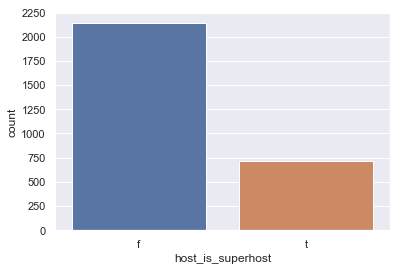

In [14]:
# Summary Statistics for Response
print(clean_data["host_is_superhost"].value_counts())

# Draw the distribution of Response
sb.countplot(clean_data["host_is_superhost"])

In [15]:
#converting the true and false to 1 and 0
host_is_superhost = pd.get_dummies(clean_data['host_is_superhost'],drop_first=True)
host_is_superhost.columns=['host_is_superhost']
host_is_superhost.head()

host_is_superhost
0                  0
1                  1
2                  0
4                  0
6                  1

In [16]:
clean_data.drop(['host_is_superhost'],axis=1,inplace=True)

In [17]:
clean_data = pd.concat([clean_data, host_is_superhost],axis=1)
clean_data.head()

review_scores_rating  price  availability_365  host_total_listings_count  \
0                  95.0   85.0               346                        3.0   
1                  96.0  150.0               291                        6.0   
2                  97.0  975.0               220                        2.0   
4                  92.0  450.0               365                        2.0   
6                  99.0   80.0               346                        1.0   

   host_response_rate  host_is_superhost  
0                96.0                  0  
1                98.0                  1  
2                67.0                  0  
4               100.0                  0  
6               100.0                  1

## Exploratory Data Analysis

In [18]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 3814
Data columns (total 6 columns):
review_scores_rating         2859 non-null float64
price                        2859 non-null float64
availability_365             2859 non-null int64
host_total_listings_count    2859 non-null float64
host_response_rate           2859 non-null float64
host_is_superhost            2859 non-null uint8
dtypes: float64(4), int64(1), uint8(1)
memory usage: 216.8 KB


In [19]:
print("Data type : ", type(clean_data))
print("Data dims : ", clean_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2859, 6)


In [20]:
#split the clean_data into iv(predixtors) and dv(response)
iv = pd.DataFrame(clean_data[['host_response_rate', 'price', 'availability_365', 'review_scores_rating',
                             'host_total_listings_count']])
dv = pd.DataFrame(clean_data['host_is_superhost'])

In [21]:
# Summary Statistics for Response
print(dv["host_is_superhost"].value_counts())

0    2140
1     719
Name: host_is_superhost, dtype: int64


In [22]:
# check the statistics of predictors
iv.describe()

host_response_rate        price  availability_365  \
count         2859.000000  2859.000000       2859.000000   
mean            95.223155   123.619447        253.880028   
std             11.282144    86.990436        120.661270   
min             17.000000    22.000000          0.000000   
25%             98.000000    73.000000        149.000000   
50%            100.000000   100.000000        318.000000   
75%            100.000000   149.000000        358.500000   
max            100.000000   999.000000        365.000000   

       review_scores_rating  host_total_listings_count  
count           2859.000000                2859.000000  
mean              94.534453                   7.566632  
std                6.526614                  26.822904  
min               20.000000                   1.000000  
25%               93.000000                   1.000000  
50%               96.000000                   1.000000  
75%               99.000000                   3.000000  
max              100.000000                 502.000000

## Split the data into train and test set

In [77]:
# Split the Dataset into Train and Test
iv_train, iv_test, dv_train, dv_test = train_test_split(iv, dv, test_size = 0.25)

# Check the sample sizes
print("Train Set :", dv_train.shape, iv_train.shape)
print("Test Set  :", dv_test.shape, iv_test.shape)

Train Set : (2144, 1) (2144, 5)
Test Set  : (715, 1) (715, 5)


## Basic Exploration

0    1585
1     559
Name: host_is_superhost, dtype: int64


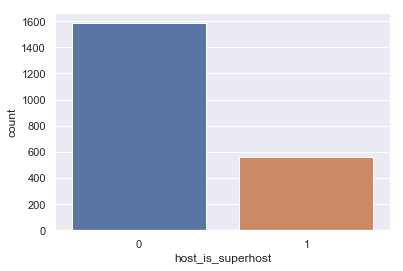

In [84]:
# Summary Statistics for Response
print(dv_train["host_is_superhost"].value_counts())

# Draw the distribution of Response
sb.countplot(dv_train["host_is_superhost"])

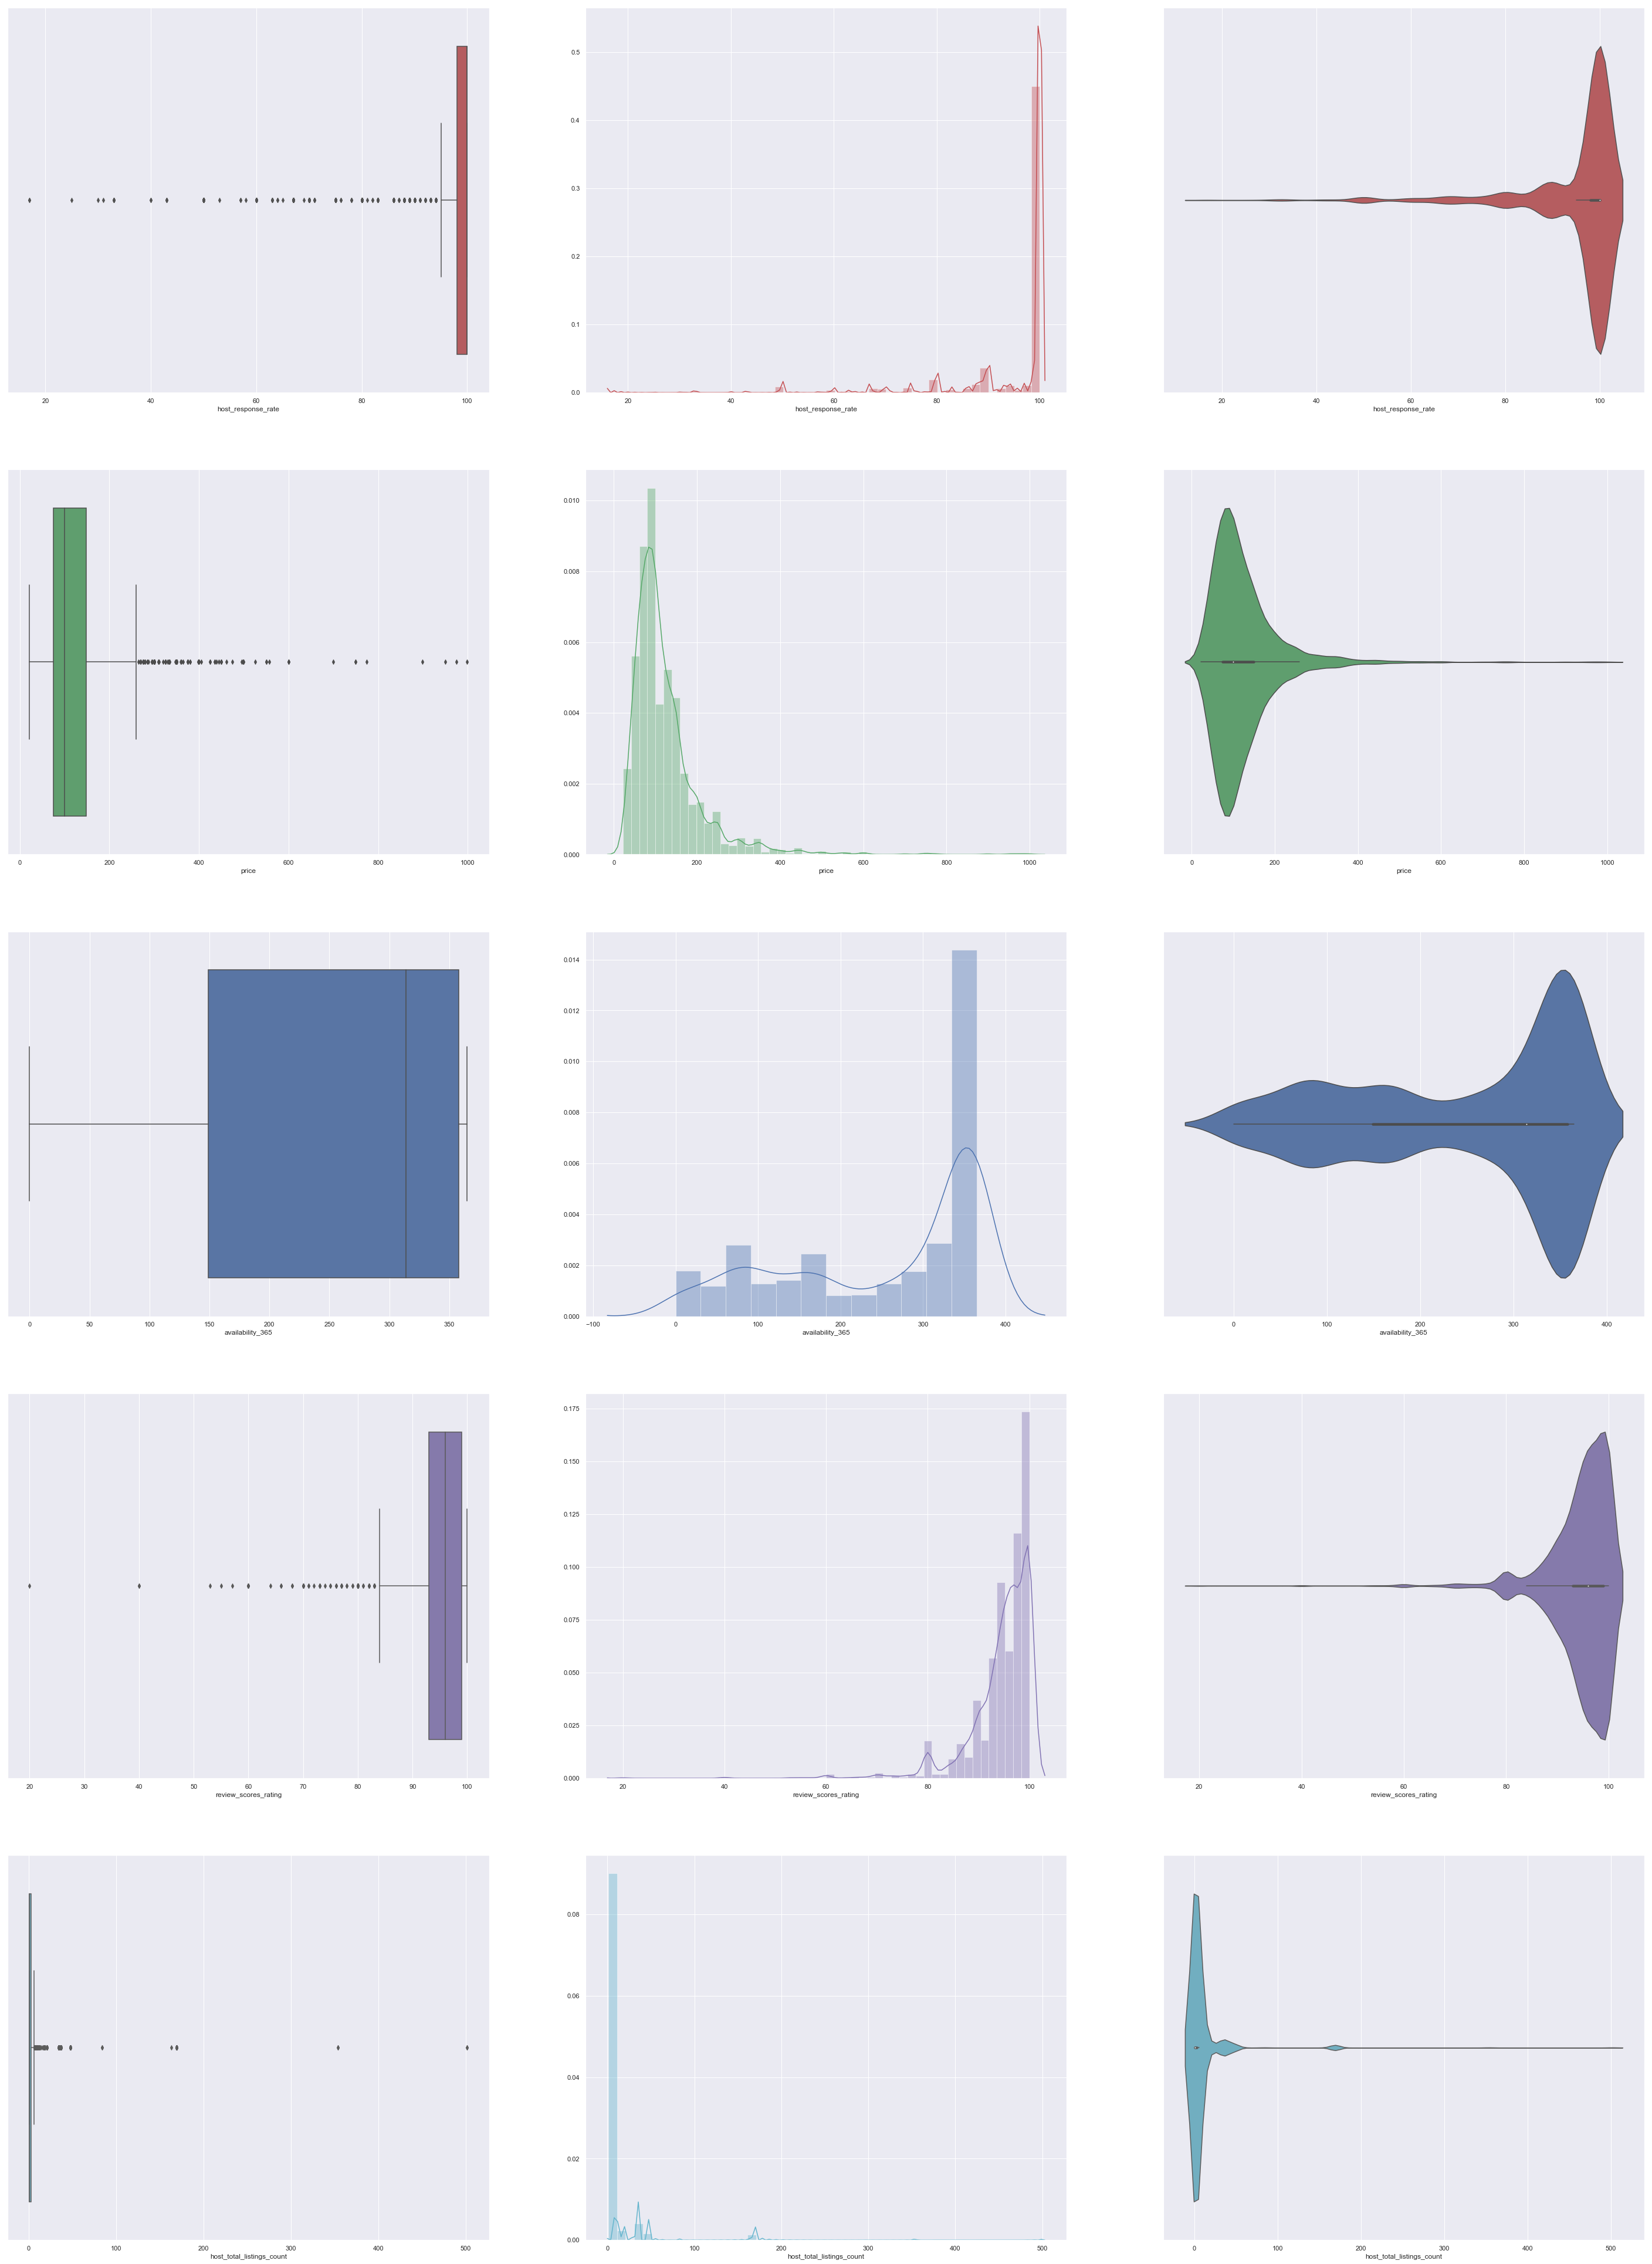

In [85]:
#Distributions of predictors
f, axes = plt.subplots(5, 3, figsize=(50, 70))
colors = ["r", "g", "b", "m", "c"]

i=0
for var in iv_train:
    sb.boxplot(iv_train[var], orient = "h", color = colors[i], ax = axes[i,0])
    sb.distplot(iv_train[var], color = colors[i], ax = axes[i,1])
    sb.violinplot(iv_train[var], color = colors[i], ax = axes[i,2])
    i+=1

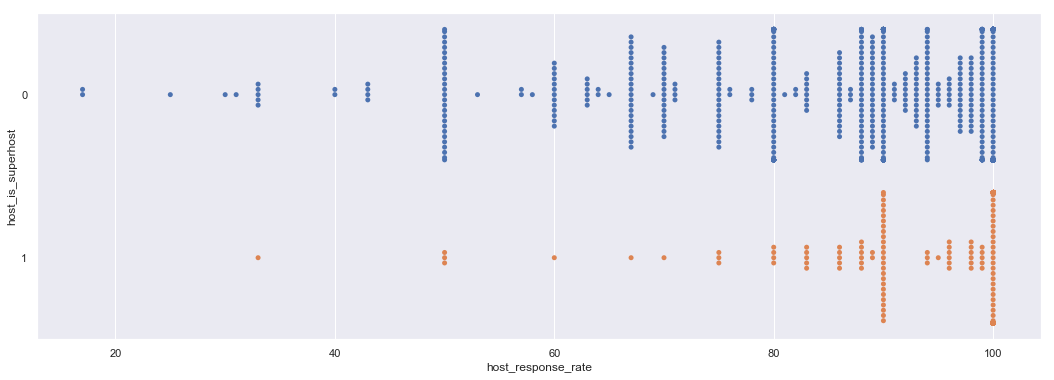

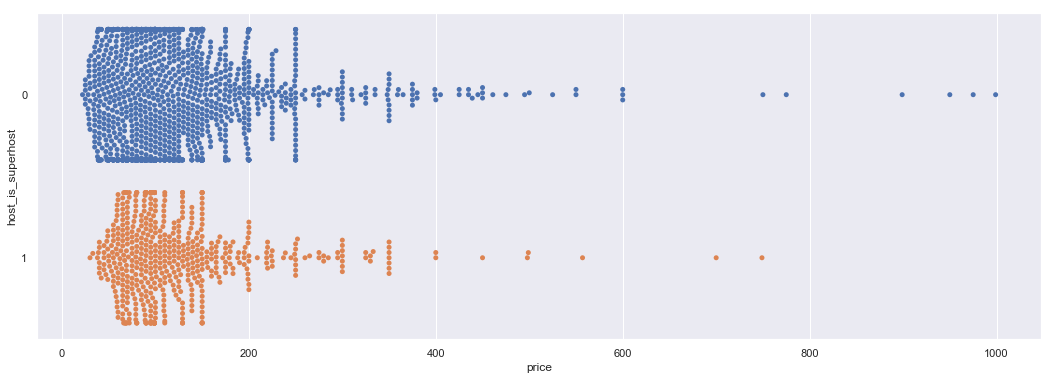

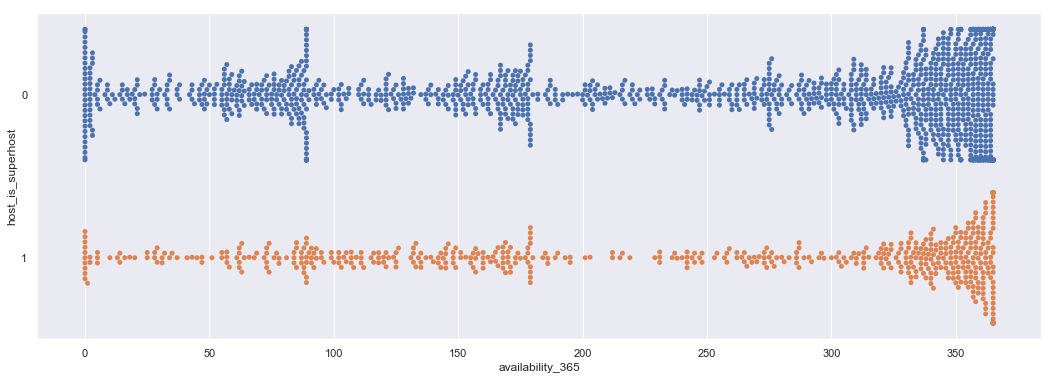

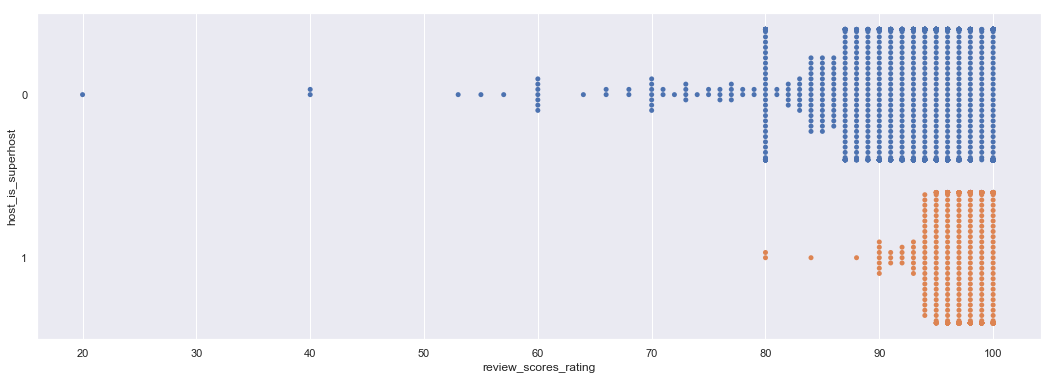

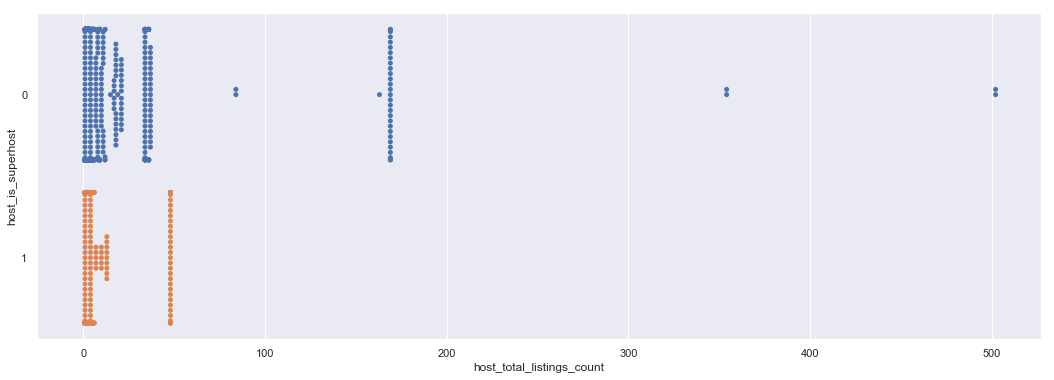

In [86]:
# Relationship between Response and the Predictors
trainDF = pd.concat([dv_train, iv_train.reindex(index=dv_train.index)], sort = False, axis = 1)

for var in iv_train:
    f, axes = plt.subplots(1, 1, figsize=(18, 6))
    sb.swarmplot(x = iv_train[var], y = "host_is_superhost", data = trainDF, orient = "h")



## Predicting and classifying host_is_superhost using Logistic Regression

In [87]:
logreg = LogisticRegression()
logreg.fit(iv_train,dv_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
dv_train_pred = logreg.predict(iv_train)
dv_test_pred = logreg.predict(iv_test)

print("Accuracy:",metrics.accuracy_score(dv_train, dv_train_pred))
print("Accuracy:",metrics.accuracy_score(dv_test, dv_test_pred))

Accuracy: 0.7392723880597015
Accuracy: 0.7762237762237763


In [89]:
print(confusion_matrix(dv_train, dv_train_pred))

[[1585    0]
 [ 559    0]]


In [90]:
print(confusion_matrix(dv_test, dv_test_pred))

[[555   0]
 [160   0]]


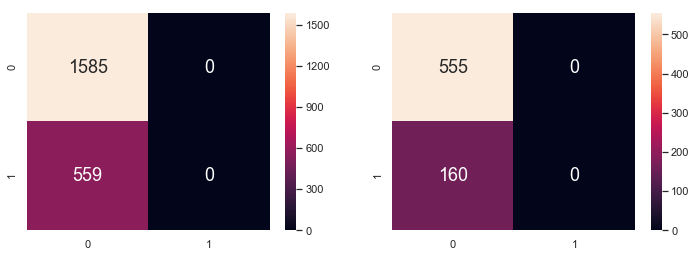

In [91]:
#show the confusion matrix using heatmap
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(dv_train, dv_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(dv_test, dv_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Receiver Operating Characteristics(ROC) curve
This curve is a plot of true positve rate against the false positive rate. It shows the tradeoff between sensitivity ad specificity. An AUC score of 1 represents perfect classifier while 0.5 represents a worthless classifier.

reference: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

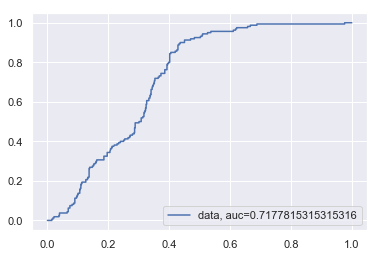

In [92]:
dv_pred_proba = logreg.predict_proba(iv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(dv_test,  dv_pred_proba)
auc = metrics.roc_auc_score(dv_test, dv_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Conclusion for Logistic Regression

The accuracy for both train and test set are approximately 0.74 and 0.78 respectively, indicating that this supervised learning model is able to predict external data with high confidence. The ROC curve is the plot between false positive rate and true Positive rate. From the curve plotted, the AUC is approximately 0.72, which also supports the model's accuracy. 

However, as shown in the confusion matrix using heatmap, there are no true positive and false positive cases, indicating that for all inputs, the predicted output is 0. Hence, this shows that accuracy is not the best measure of performance for this logistic model. 

There are 2140 non-superhost listings and only 719 superhost listings, as shown in the countplot. This data imbalance is a common problem in data science and since machine learning algorithms work best when the number of samples in each class are about equal, this would result in a flawed prediction model. 

It is possible to solve data imbalance by a resampling technique called oversampling, where more copies of minority classes are added. Since we also have a small sample size, it can be a good choice. 

However, even without oversampling, there is another model approach that frequently perform well on imbalanced data - Decision Tree. As a Decision Tree model works by learning a hierarchy of if/else questions, it can force both classes to be addressed.

Hence, next, we are going to use the Decision tree model approach to predict whether the host is superhost. 

## Predicting and classifying host_is_superhost using Decision Tree

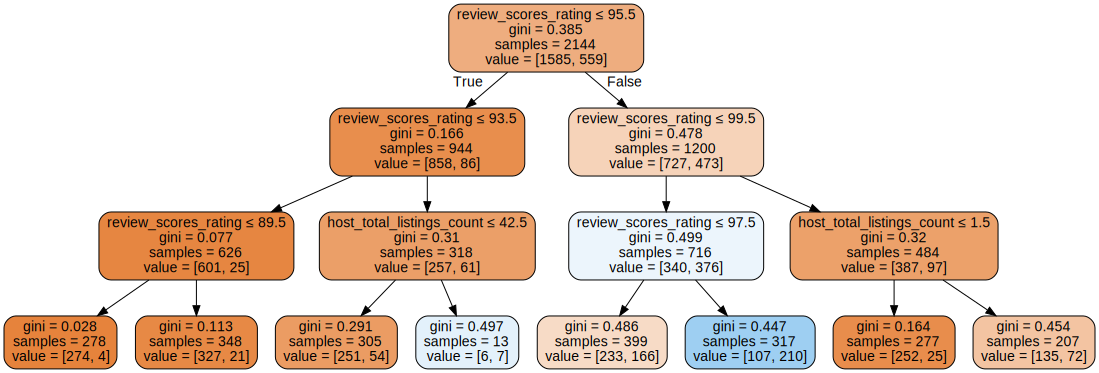

In [93]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(iv_train, dv_train)                    # train the decision tree model

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = iv_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7877798507462687

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8167832167832167



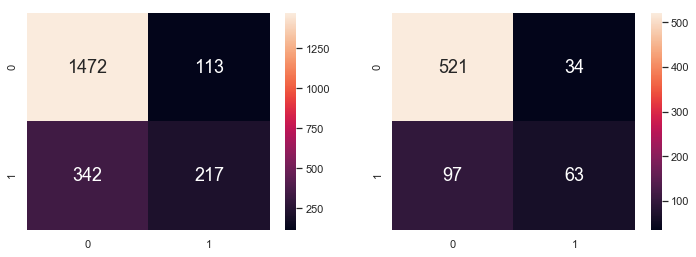

In [94]:
# Predict Legendary values corresponding to Total
dv_train_pred = dectree.predict(iv_train)
dv_test_pred = dectree.predict(iv_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(iv_train, dv_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(iv_test, dv_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(dv_train, dv_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(dv_test, dv_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Conclusion for Decision Tree

From the decision tree, the accuracy obtained for both train and test set are 0.79 and 0.82 respectively. There are also true positive and false positive cases now. 

Hence, as we mentioned above, when data is imbalanced, decision tree model is more suitable and can predict with higher confidence whether a host can be considered a superhost. 

Based on the visualized Decision Tree, Review_Score_rating is the most important factor to determine whether the host is superhost. This is because it appears at the top of the tree and it is also the predictor that appears the most frequently among all the variables. The next variable that is most important is the host_total_listings_count.

## Conclusion
From the Logistic Regression approach, we have learnt that accuracy is not always the best measure of performance, especially when data is imbalanced and it is always a good idea to try a variety of algorithms when building supervised learning models in order to find the best one. 

The Decision Tree model gave accuracies of 0.70-0.85, indicating that the predictors: price, review_score_rating, availability_365, host_total_listings_count, host_response_rate are useful for predicting superhost.

We can conclude that when data is imbalanced, the decision tree approach is a better model to adopt compared to logistic regression approach. However, if the dataset is subjected to resampling techniques, like oversampling in this case, the logistic regression approach is likely to be able to predict superhost with high confidence too.

### Future exploration and Improvement
For future exploration, we can consider Random Forest and K-Nearest Neighbors (KNN) and compare the results across models to find the best one. It is also always a good rule of thumb to increase sample size if possible and collect more complete data (with less NaN values). 

Lastly, other than the current numerical variables as predictors, we can also consider including categorical variables to predict superhost. 

# Sentiment analysis for the given reviews

In this section, we will be using natural language processing to detect the sentiment or tone of the reviews given by past customers and create a score system based on their sentiments. 

In [2]:
df_1 = pd.read_csv('reviews.csv')
# checking shape ...
print("The dataset has {} rows and {} columns.".format(*df_1.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df_1.duplicated().sum()))

The dataset has 84849 rows and 6 columns.
It contains 0 duplicates.


In [3]:
df_1.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [4]:
df_2 = pd.read_csv('listings.csv')
df_2.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [5]:
df = pd.merge(df_1, df_2[['neighbourhood_group_cleansed', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type', 'price']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)
df.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments neighbourhood_group  \
0  Cute and cozy place. Perfect location to every...          Queen Anne   
1  Kelly has a great room in a very central locat...          Queen Anne   
2  Very spacious apartment, and in a great neighb...          Queen Anne   
3  Close to Seattle Center and all it has to offe...          Queen Anne   
4  Kelly was a great host and very accommodating ...          Queen Anne   

    host_id  latitude   longitude  number_of_reviews property_type   price  
0  37686877  47.62621 -122.360147                 16     Apartment  $75.00  
1  37686877  47.62621 -122.360147                 16     Apartment  $75.00  
2  37686877  47.62621 -122.360147                 16     Apartment  $75.00  
3  37686877  47.62621 -122.360147                 16     Apartment  $75.00  
4  37686877  47.62621 -122.360147                 16     Apartment  $75.00

In [6]:
print("df dims :", df.shape)

df dims : (84849, 13)


In [7]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(df.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head()

listing_id
host_id            
8534462          41
4962900          37
3074414          34
74305            31
430709           29

In [8]:
top1_host = df.host_id == 8534462
df[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

listing_id
neighbourhood_group            
Capitol Hill                  2
Cascade                       3
Downtown                     36

In [9]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

listing_id
property_type            
Apartment              39
Condominium             2

In [10]:
df.dropna(inplace = True)
df.isna().sum()

listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments               0
neighbourhood_group    0
host_id                0
latitude               0
longitude              0
number_of_reviews      0
property_type          0
price                  0
dtype: int64

In [11]:
from langdetect import detect
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [12]:
%%time
df['language'] = df['comments'].apply(language_detection)

Wall time: 11min 19s


In [13]:
df['language'].value_counts().head(10)

en       83779
fr         238
de         213
zh-cn      160
es          82
ko          52
ro          43
nl          39
ja          29
pt          25
Name: language, dtype: int64

Number of reviews for each language. The function language_detection is used to detect which language the comment is written in.

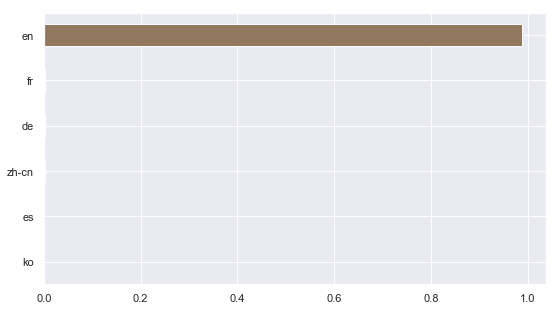

In [14]:
ax = df.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

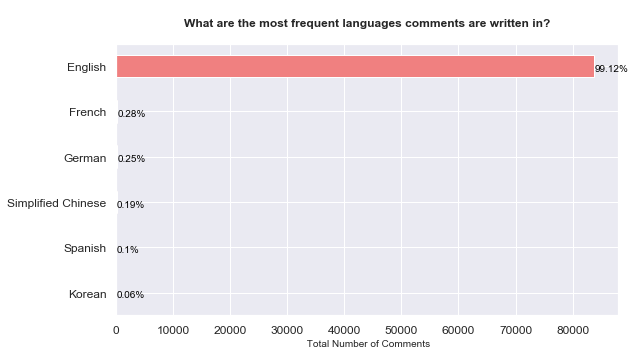

In [15]:
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'German', 'Simplified Chinese', 'Spanish', 'Korean'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

We now create 3 new dataframes, each storing the reviews given in a particular language - English, German and French (the three most commonly used languages).

In [16]:
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhenj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

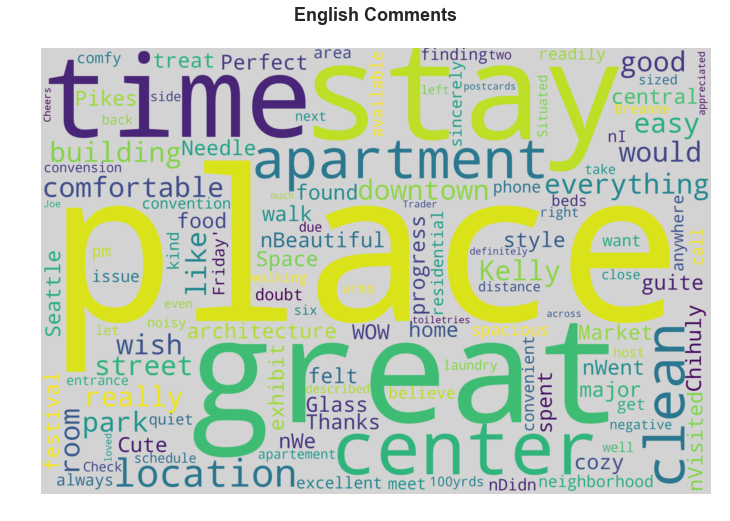

In [20]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

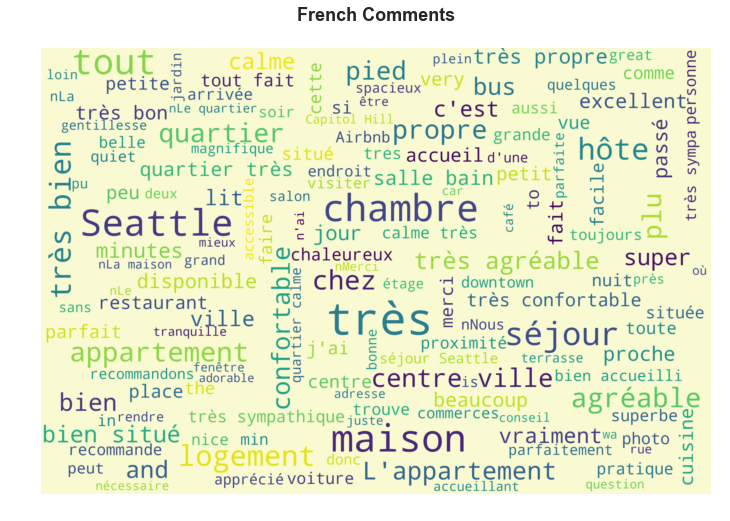

In [21]:
wordcloud = WordCloud(max_font_size=200, max_words=150, background_color="lightgoldenrodyellow",
                      #width=1600, height=800,
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df_fr.comments.values))

plot_wordcloud(wordcloud, 'French')

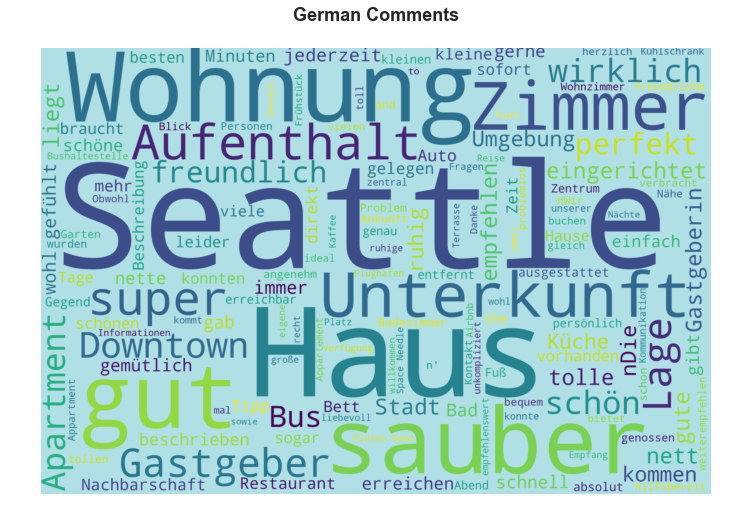

In [22]:
wordcloud = WordCloud(max_font_size=None, max_words=150, background_color="powderblue",
                      width=3000, height=2000,
                      stopwords=stopwords.words('german')).generate(str(df_de.comments.values))

plot_wordcloud(wordcloud, 'German')

In [23]:
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zhenj\AppData\Roaming\nltk_data...


In [24]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [25]:
df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

The method .apply() applies one of four functions - negative_score, neutral_score, positive_score and compound_score. When applied to a line, the method returns the neutral, negative or positive rating (value between 0 and 1) for that particular review, and each of these values for each review is stored in the respective columns in each language database.

In [26]:
df = df_eng
df[['sentiment_neg','sentiment_neu', 'sentiment_pos', 'sentiment_compound']].head()

sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound
0          0.000          0.462          0.538              0.7901
1          0.000          0.609          0.391              0.9872
2          0.043          0.772          0.185              0.8718
3          0.035          0.765          0.200              0.8313
4          0.000          0.655          0.345              0.9783

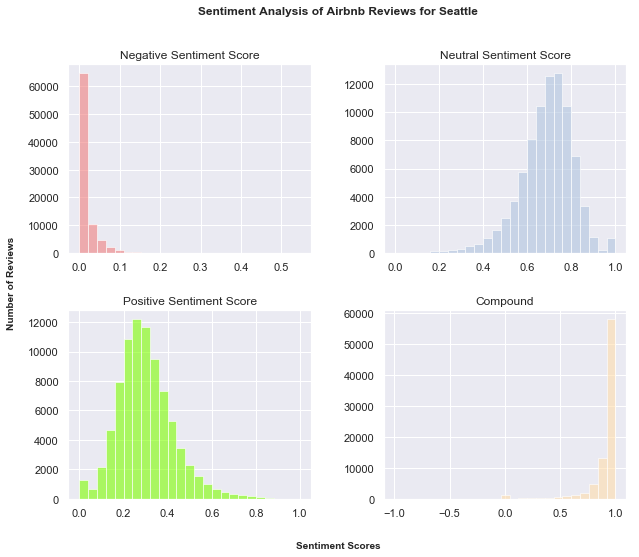

In [27]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Seattle\n\n', fontsize=12, fontweight='bold');

The first 3 histograms plot the negative, neutral and positive score ratings for all the reviews, while the last histogram combines all the 3 ratings to give a comprehensive compound rating for the reviews.

In [28]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    83779.000000
mean         0.896046
std          0.191507
min         -0.995600
5%           0.622080
10%          0.784000
20%          0.879300
30%          0.918300
40%          0.940200
50%          0.954900
60%          0.965500
70%          0.974000
80%          0.981200
90%          0.988000
max          0.999700
Name: sentiment_compound, dtype: float64

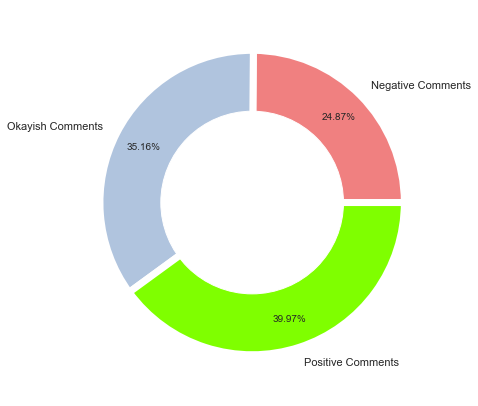

In [29]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [30]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [31]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [32]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

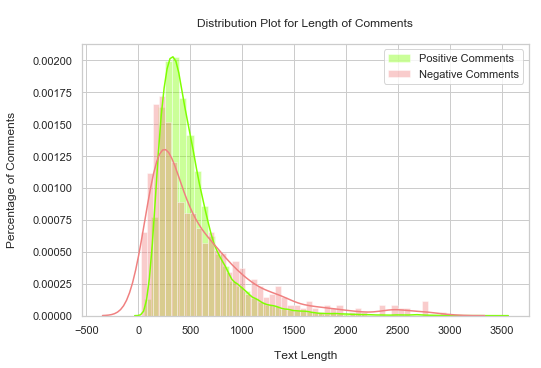

In [33]:
sb.set_style("whitegrid")
plt.figure(figsize=(8,5))

sb.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sb.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

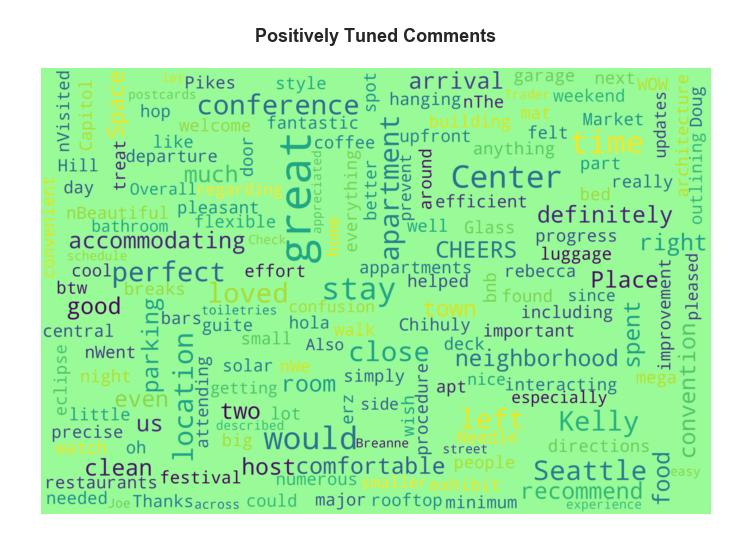

In [34]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

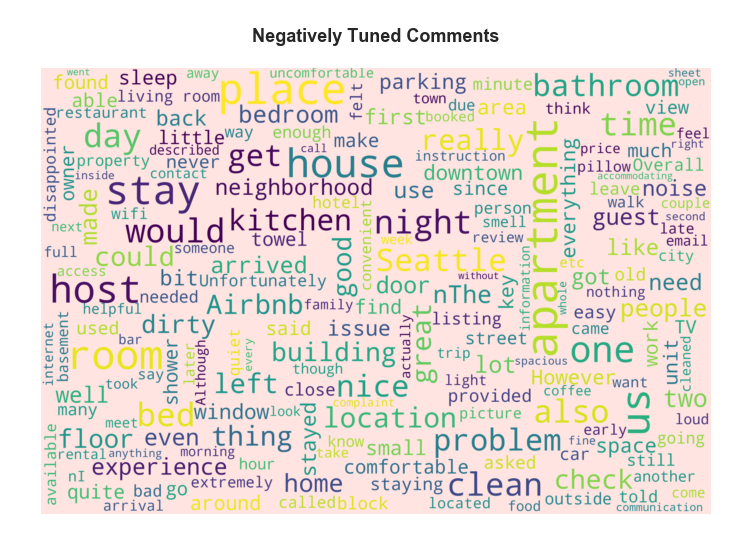

In [35]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

## Conclusion
From Sentiment Analysis, we can determine whether the overall reviews for a particular apartment are positive, negative or neutral.

### Future exploration and Improvement
1) Implementation of more advanced sentiment analysis algorithms such as Support Vector Machine(SVM) and Naïve Bayes.

2) Adding an API for a translator so that reviews from all languages can be considered for sentiment analysis.

3) From the Decision Tree of predicting whether the host is superhost, we notice that the review_score_rating is the most important variable in predicting superhost. Therefore, in the future, it is very possible for the findings in the sentiment analysis to be combined with the review_score_rating to predict whether a host is superhost. However, this is not possible using the current data set as for each host_id, the number of reviews is not enough to be used for prediction.

# APPENDIX
The appendix contains a price regression model with low explained variance (<0.5) and high MSE.

The analysis here let us conclude that this supervised learning model was weak and does not value-add to the prediction of prices. Our model shows that price has a weak relationship with the numerical factors used in the model and could be affected more by other factors that have not been recorded during data collection. 

# Regression of price against a few numerical variables

Next, we are going to predict the regression relationship between price and host_response_rate, host_acceptance_rate, host_total_listings_count, accommodates, guests_included, extra_people, minimum_nights, maximum_nights,  availability_365, and review_scores_rating.

Response: **price**

Predictor: **host_response_rate**, **host_total_listings_count**, **accommodates**, **guests_included**, **extra_people**, **minimum_nights**, **maximum_nights**, **availability_365**, **review_scores_rating**

In [109]:
# extract the variables needed and put them in a dataframe
data2 = pd.DataFrame(listings[['host_response_rate', 'host_total_listings_count', 'accommodates','guests_included', 
                               'extra_people', 'minimum_nights', 'maximum_nights',  'availability_365', 'review_scores_rating',
                               'price']])
data2.head()

host_response_rate  host_total_listings_count  accommodates  \
0                96.0                        3.0             4   
1                98.0                        6.0             4   
2                67.0                        2.0            11   
3                 NaN                        1.0             3   
4               100.0                        2.0             6   

   guests_included  extra_people  minimum_nights  maximum_nights  \
0                2           5.0               1             365   
1                1           0.0               2              90   
2               10          25.0               4              30   
3                1           0.0               1            1125   
4                6          15.0               1            1125   

   availability_365  review_scores_rating  price  
0               346                  95.0   85.0  
1               291                  96.0  150.0  
2               220                  97.0  975.0  
3               143                   NaN  100.0  
4               365                  92.0  450.0

In [110]:
# check percentage of NaN values in data set
(len(data2)-data2.count())/len(data2)*100

host_response_rate           13.698271
host_total_listings_count     0.052383
accommodates                  0.000000
guests_included               0.000000
extra_people                  0.000000
minimum_nights                0.000000
maximum_nights                0.000000
availability_365              0.000000
review_scores_rating         16.946045
price                         0.000000
dtype: float64

In [111]:
# drop NaN rows
clean_data2=data2.dropna(axis=0)

# % of rows droppped
(len(data2)-len(clean_data2))/len(data2)*100

25.117862755369302

In [112]:
# clean the data to convert them to float
clean_data2['host_response_rate'] = clean_data2['host_response_rate'].astype(str)
clean_data2['price'] = clean_data2['price'].astype(str)
clean_data2['extra_people'] = clean_data2['extra_people'].astype(str)

clean_data2['host_response_rate'] = clean_data2['host_response_rate'].str.replace("%", "").astype("float")
clean_data2['price'] = clean_data2['price'].str.replace("[$, ]", "").astype("float")
clean_data2['extra_people'] = clean_data2['extra_people'].str.replace("[$, ]", "").astype("float")

## Exploratory Data Analysis

In [113]:
# check the info of the new dataframe
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 3814
Data columns (total 10 columns):
host_response_rate           2859 non-null float64
host_total_listings_count    2859 non-null float64
accommodates                 2859 non-null int64
guests_included              2859 non-null int64
extra_people                 2859 non-null float64
minimum_nights               2859 non-null int64
maximum_nights               2859 non-null int64
availability_365             2859 non-null int64
review_scores_rating         2859 non-null float64
price                        2859 non-null float64
dtypes: float64(5), int64(5)
memory usage: 245.7 KB


In [114]:
print("Data type : ", type(clean_data2))
print("Data dims : ", clean_data2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2859, 10)


In [115]:
#split the clean_data into x_data(predixtors) and y_data(response)
x_data = pd.DataFrame(clean_data2[['host_response_rate', 'host_total_listings_count', 'accommodates', 'guests_included', 
                                  'extra_people', 'minimum_nights', 'maximum_nights',  'availability_365', 
                                  'review_scores_rating']])
y_data = pd.DataFrame(clean_data2['price'])

In [116]:
# check the statistics of predictors
x_data.describe()

host_response_rate  host_total_listings_count  accommodates  \
count         2859.000000                2859.000000   2859.000000   
mean            95.223155                   7.566632      3.394544   
std             11.282144                  26.822904      1.996406   
min             17.000000                   1.000000      1.000000   
25%             98.000000                   1.000000      2.000000   
50%            100.000000                   1.000000      3.000000   
75%            100.000000                   3.000000      4.000000   
max            100.000000                 502.000000     16.000000   

       guests_included  extra_people  minimum_nights  maximum_nights  \
count      2859.000000   2859.000000     2859.000000     2859.000000   
mean          1.718783     11.325638        2.399091      723.727177   
std           1.314438     17.384809       18.780393      512.035998   
min           0.000000      0.000000        1.000000        1.000000   
25%           1.000000      0.000000        1.000000       35.000000   
50%           1.000000      5.000000        2.000000     1125.000000   
75%           2.000000     20.000000        2.000000     1125.000000   
max          13.000000    300.000000     1000.000000     1825.000000   

       availability_365  review_scores_rating  
count       2859.000000           2859.000000  
mean         253.880028             94.534453  
std          120.661270              6.526614  
min            0.000000             20.000000  
25%          149.000000             93.000000  
50%          318.000000             96.000000  
75%          358.500000             99.000000  
max          365.000000            100.000000

In [117]:
#check the statistics of response
y_data.describe()

price
count  2859.000000
mean    123.619447
std      86.990436
min      22.000000
25%      73.000000
50%     100.000000
75%     149.000000
max     999.000000

## Split the data into train and test set

In [118]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (2144, 1) (2144, 9)
Test Set  : (715, 1) (715, 9)


## Basic Exploration

In [119]:
# Summary Statistics for Response
y_train.describe()

price
count  2144.000000
mean    123.043377
std      87.651169
min      22.000000
25%      73.750000
50%      99.000000
75%     149.000000
max     999.000000

In [120]:
# Summary Statistics for Predictors
x_train.describe()

host_response_rate  host_total_listings_count  accommodates  \
count         2144.000000                2144.000000   2144.000000   
mean            95.474347                   7.729011      3.369869   
std             10.797214                  28.371934      1.980033   
min             17.000000                   1.000000      1.000000   
25%             99.000000                   1.000000      2.000000   
50%            100.000000                   1.000000      3.000000   
75%            100.000000                   3.000000      4.000000   
max            100.000000                 502.000000     16.000000   

       guests_included  extra_people  minimum_nights  maximum_nights  \
count      2144.000000   2144.000000     2144.000000     2144.000000   
mean          1.719683     11.084422        2.520522      710.922108   
std           1.326448     16.779731       21.655461      514.997551   
min           0.000000      0.000000        1.000000        1.000000   
25%           1.000000      0.000000        1.000000       31.000000   
50%           1.000000      5.000000        2.000000     1125.000000   
75%           2.000000     20.000000        2.000000     1125.000000   
max          13.000000    300.000000     1000.000000     1825.000000   

       availability_365  review_scores_rating  
count       2144.000000           2144.000000  
mean         252.198694             94.574627  
std          120.308639              6.405422  
min            0.000000             20.000000  
25%          149.000000             93.000000  
50%          312.500000             96.000000  
75%          358.000000             99.000000  
max          365.000000            100.000000

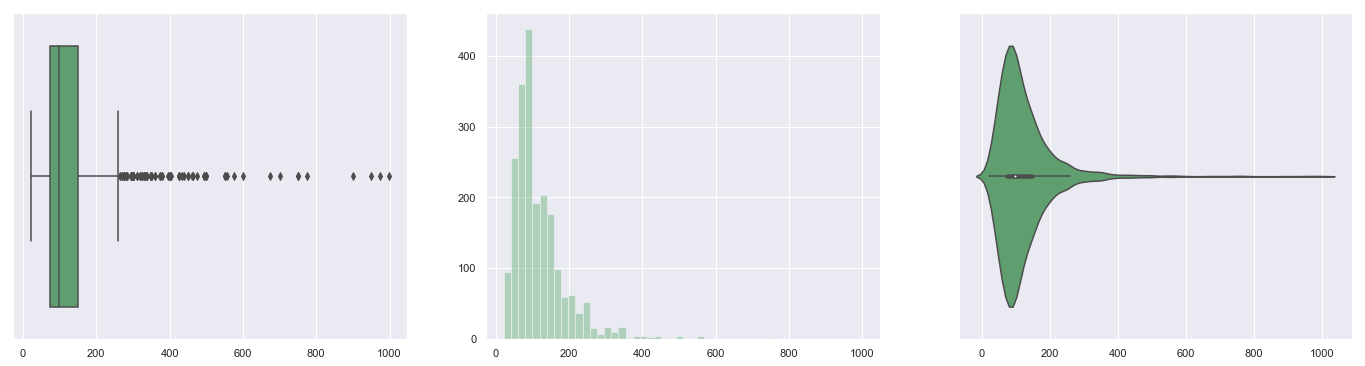

In [121]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

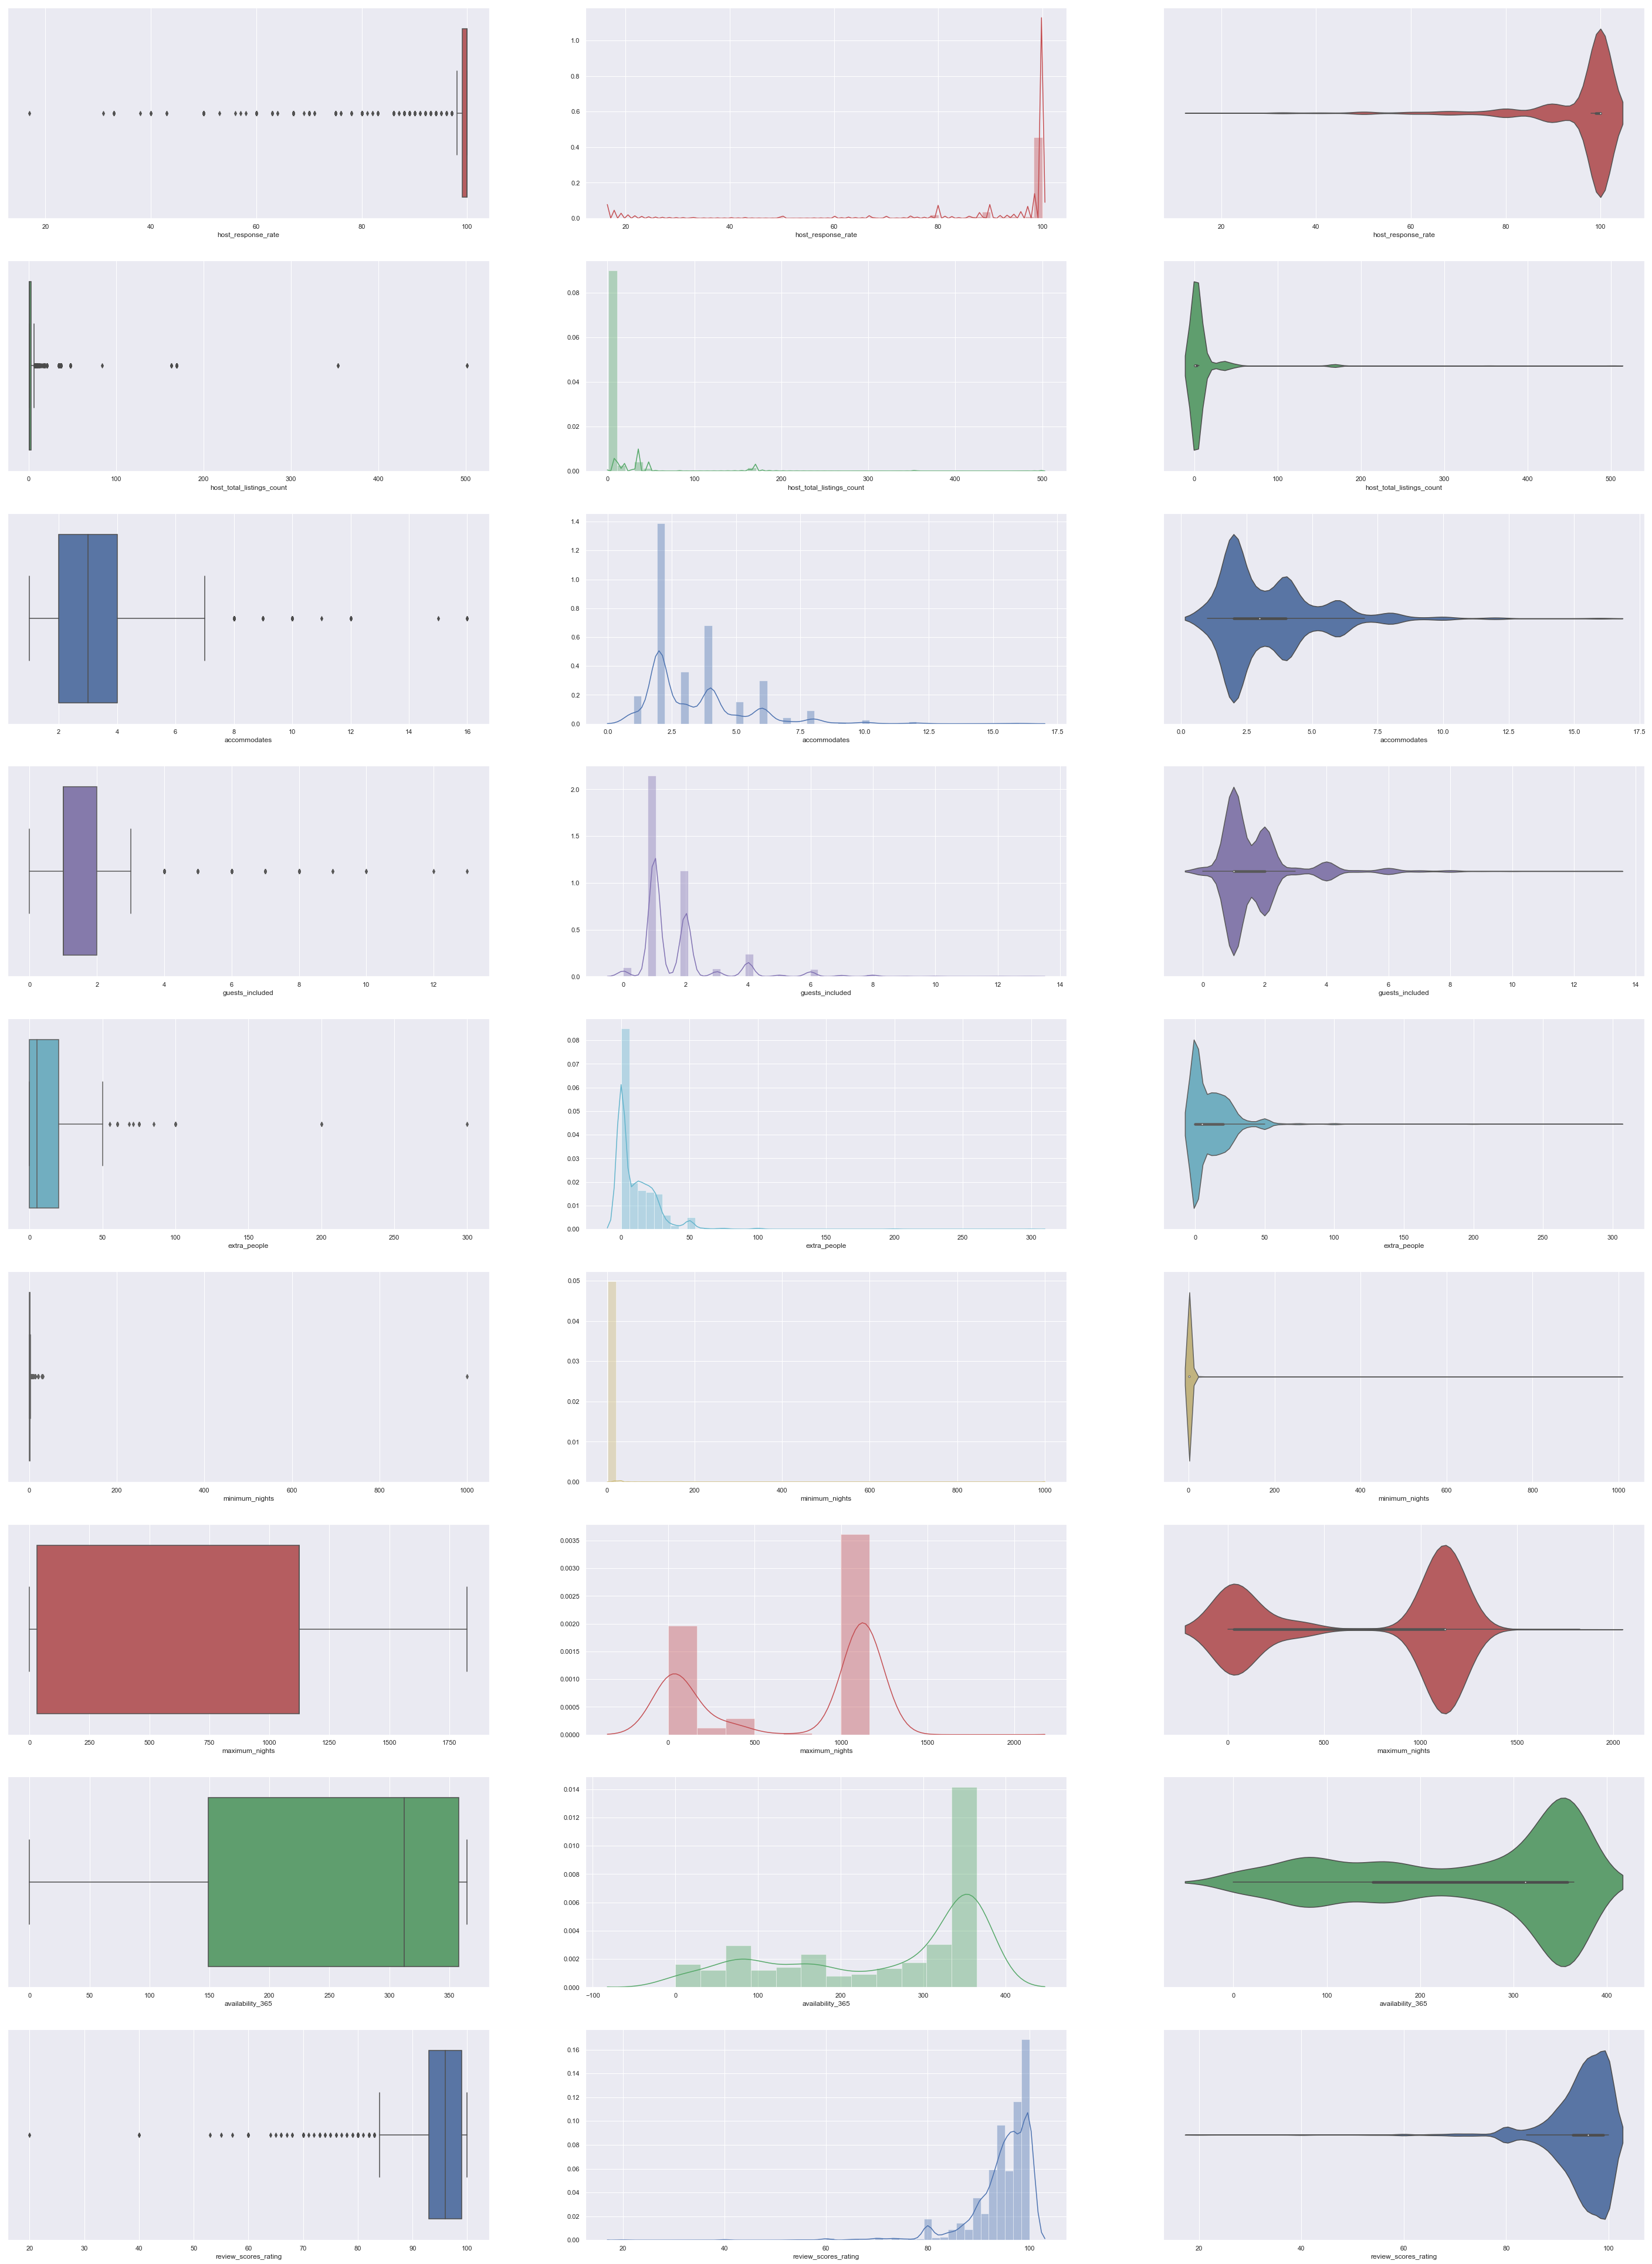

In [122]:
#Distributions of predictors
f, axes = plt.subplots(9, 3, figsize=(50, 70))
colors = ["r", "g", "b", "m", "c", "y", "r", "g", "b"]

i=0
for var in x_train:
    sb.boxplot(x_train[var], orient = "h", color = colors[i], ax = axes[i,0])
    sb.distplot(x_train[var], color = colors[i], ax = axes[i,1])
    sb.violinplot(x_train[var], color = colors[i], ax = axes[i,2])
    i+=1

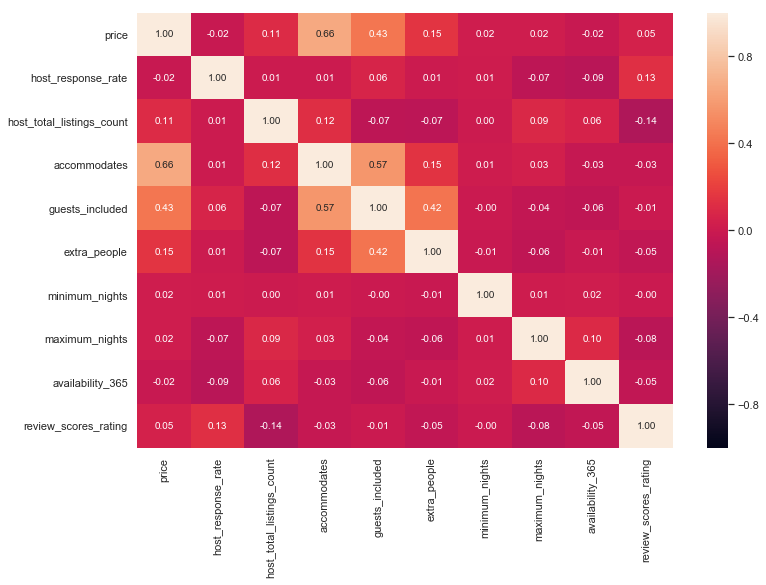

In [126]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, x_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

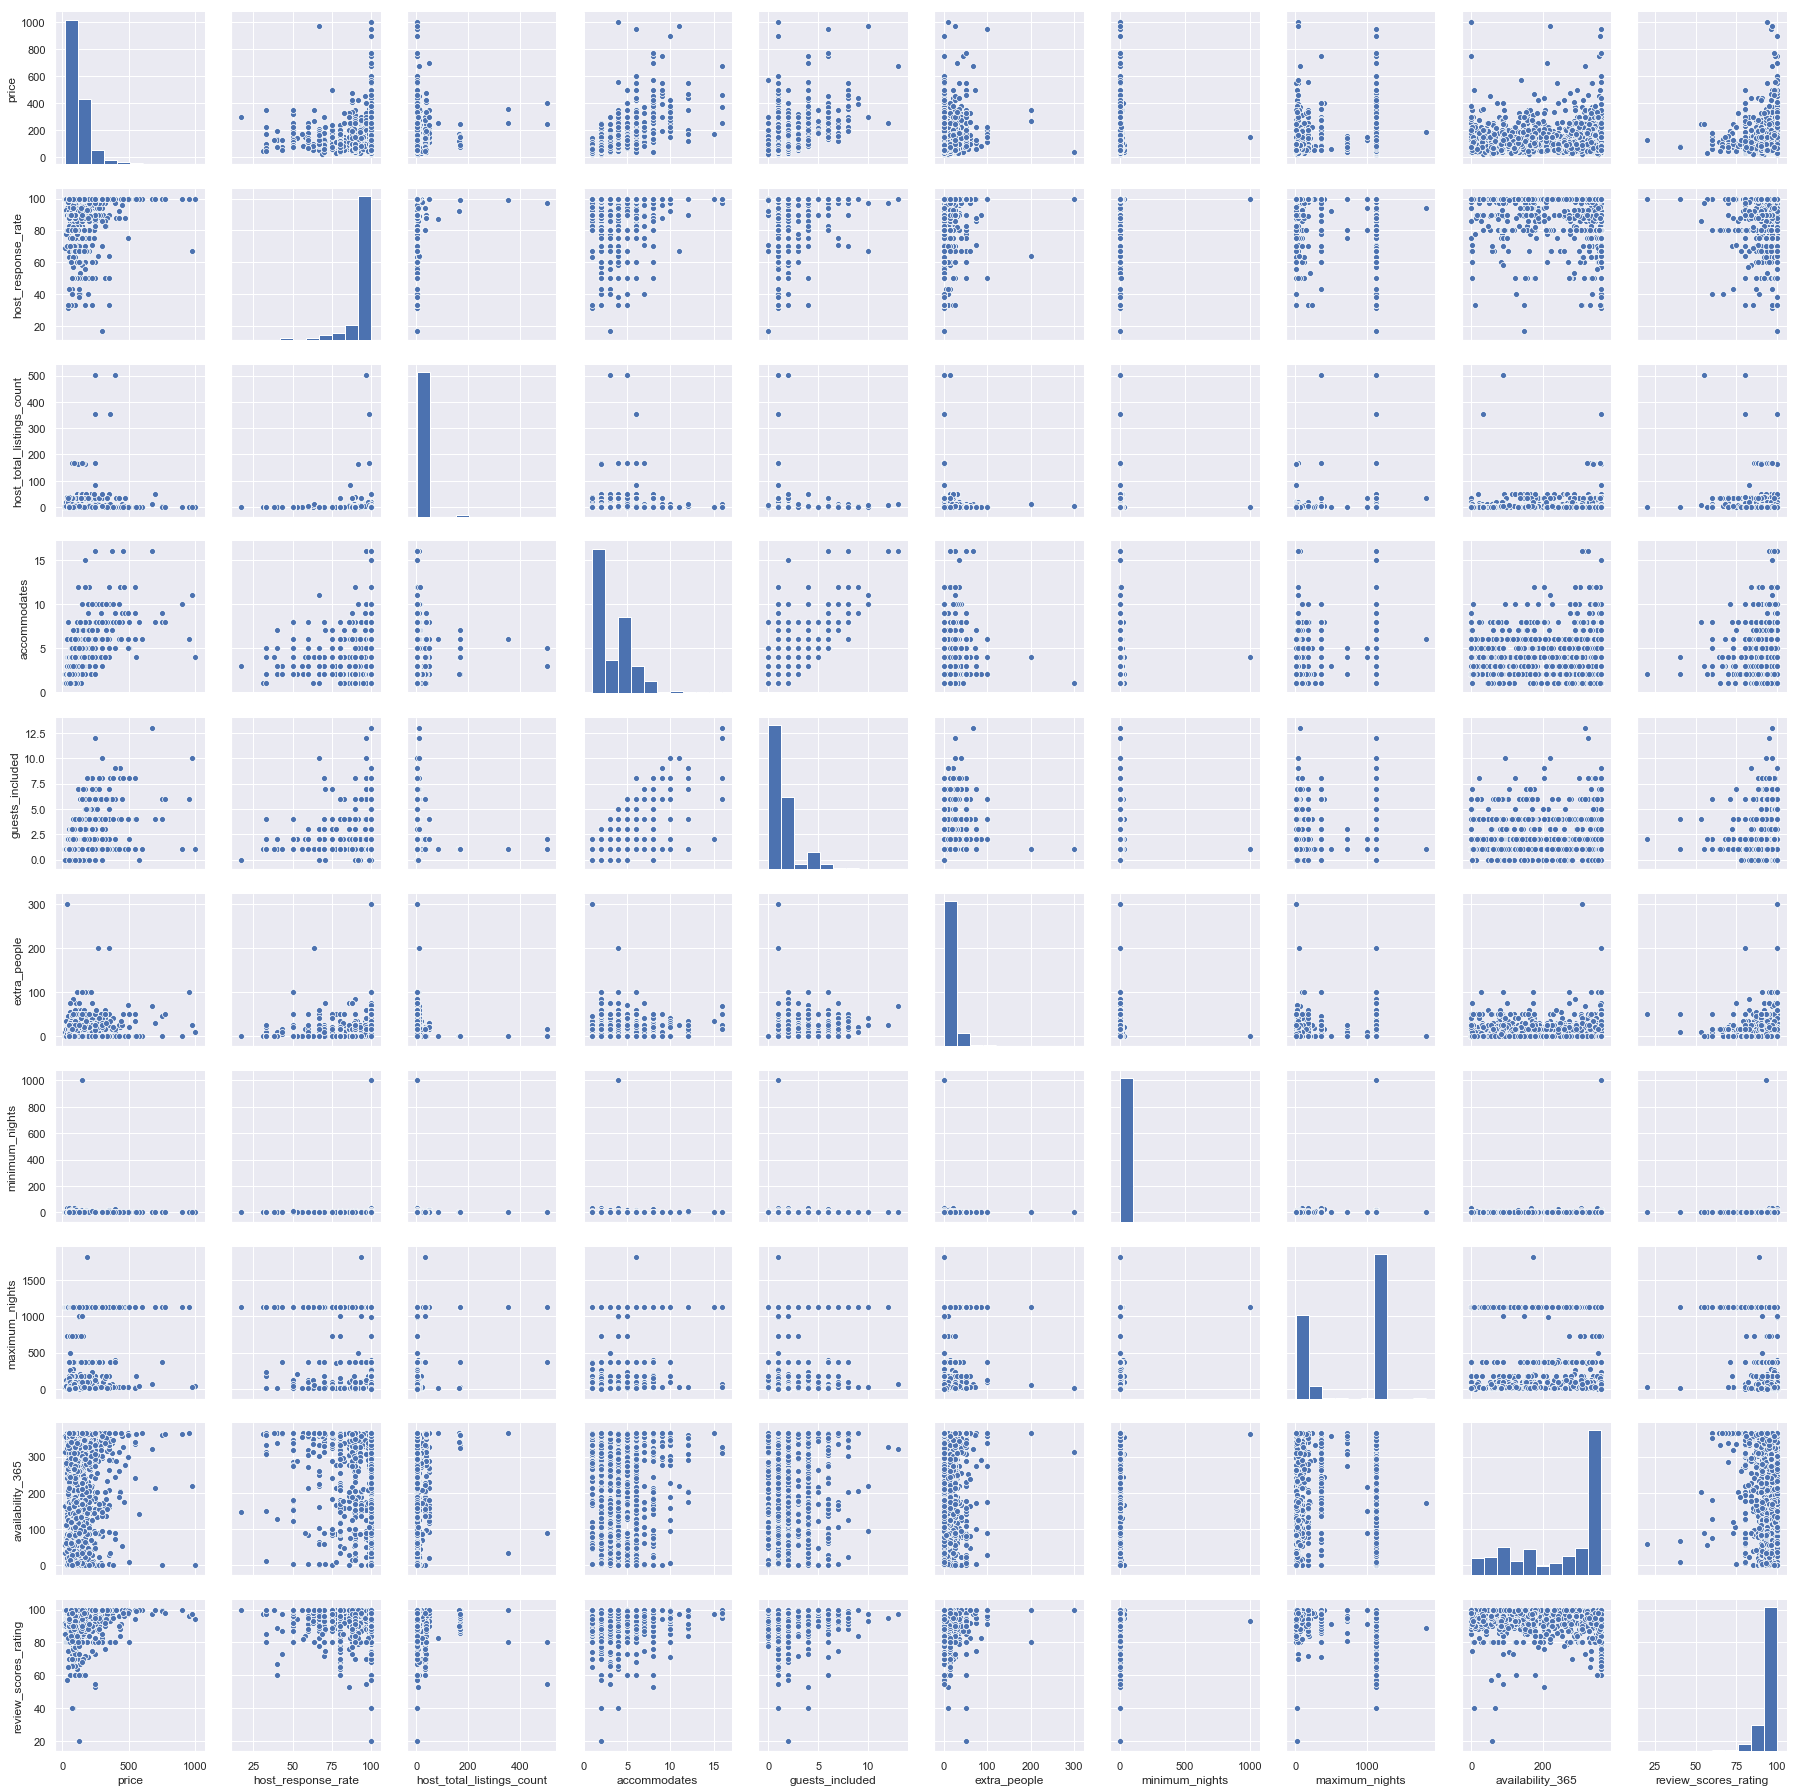

In [127]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, x_train.reindex(index=y_train.index)], sort = False, axis = 1)
sb.pairplot(data = trainDF)

## Multi-Variate Linear Regression
Response: Price

Predictors: host_response_rate 
            host_total_listings_count
            accommodates
            guests_included
            extra_people
            minimum_nights
            maximum_nights
            availability_365 
            review_scores_rating

In [128]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [-54.1755168]
Coefficients of Regression 	: a =  [[-3.31783031e-01  1.65875581e-01  2.69402246e+01  4.92048228e+00
   1.98217280e-01  4.84435866e-02  8.64861945e-04  1.78173753e-03
   1.11005959e+00]]



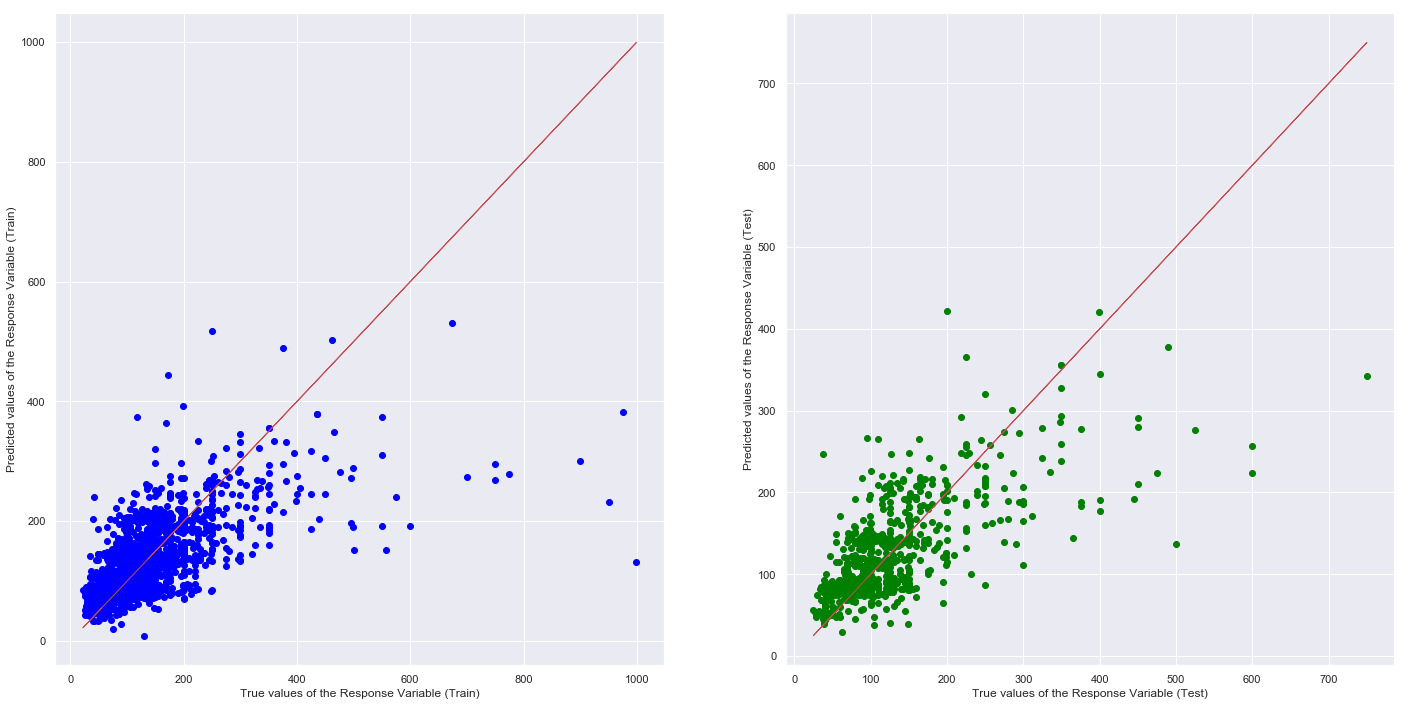

                  Predictors  Coefficients
0         host_response_rate     -0.331783
1  host_total_listings_count      0.165876
2               accommodates     26.940225
3            guests_included      4.920482
4               extra_people      0.198217
5             minimum_nights      0.048444
6             maximum_nights      0.000865
7           availability_365      0.001782
8       review_scores_rating      1.110060



In [129]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

In [130]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.45053295023812057
Mean Squared Error (MSE) 	: 4219.4366573089

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4959716668873998
Mean Squared Error (MSE) 	: 3637.8269477088343



## Conclusion
From the correlation heatmap, the correlation values between the variables and price are mostly approximately 0 (except accommodates and guests_included). This shows that price has a weak linear correlation with the variables selected. Also, from the Multi_Variate Linear Regression Model, the explained variance (R^2) for both train set and test set are quite low (<0.5). This shows that price is not directly affected by the numerical variables (host_response_rate, host_total_listings_count, accommodates, guests_included, extra_people, minimum_nights, maximum_nights, availability_365, review_scores_rating). This is further supported by the high Mean Squared Error (MSE).

Therefore, we can conclude that the numerical variables we chose for the supervised learning model are not useful in predicting price. This again may be caused by the sample size which is not large enough. 

### Future Exploration and Improvement
We can explore the relationship of the price against the categorical variables. We can also try to increase the sample size so that we can have a more accurate model and a more precise pattern can be observed.